In [2]:
import pandas as pd
import numpy as np

C:\Users\ravik\AppData\Local\Temp\ipykernel_12948\2162656668.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
#Import dataset

data= pd.read_csv("cancer_treatment_data.csv")
data.head(10)

,Patient_ID,Age,Gender,Cancer_Stage,PD-L1_Level,EGFR_Mutation_Count,Tumor_Size,Treatment_Type,Smoking_Status,Response
0,1,62,Male,Stage III,99,8,9.100000,Chemotherapy,Current,Non-Responder
1,2,71,Female,Stage II,92,11,7.800000,Chemotherapy,Never,Responder
2,3,56,NaN,Stage IV,22,8,8.500000,Immunotherapy,Former,Responder
3,4,79,Female,Stage IV,31,3,8.000000,Chemotherapy,Former,Non-Responder
4,5,59,Male,Stage II,10,14,9.800000,Chemotherapy,NaN,Non-Responder
5,6,69,Female,Stage II,65,4,7.800000,Immunotherapy,Former,Non-Responder
6,7,67,Male,Stage IV,95,9,2.900000,Chemotherapy,Former,Responder
7,8,86,Female,Stage IV,4,6,8.100000,Chemotherapy,Current,Responder
8,9,112,Male,Stage II,94,5,8.658840,Immunotherapy,Former,Non-Responder
9,10,90,Male,Stage IV,12,14,22.202153,Chemotherapy,NaN,Responder


In [4]:
#Renaming the field
data.rename(columns={'PD-L1_Level': 'PD-L1_Level(%)'}, inplace=True)


# Inspect data Structure

In [5]:
#Check the shape of data
data.shape

(3000, 10)

The dataset consists of 3000 rows and 10 columns.

In [6]:
#Column names and data types
data.dtypes

Patient_ID               int64
Age                      int64
Gender                  object
Cancer_Stage            object
PD-L1_Level(%)           int64
EGFR_Mutation_Count      int64
Tumor_Size             float64
Treatment_Type          object
Smoking_Status          object
Response                object
dtype: object

In [7]:
# Convert the text columns to the string data type
data['Gender'] = data['Gender'].astype("string")
data['Cancer_Stage']= data['Cancer_Stage'].astype("string")
data['Treatment_Type']=data['Treatment_Type'].astype("string")
data['Smoking_Status']=data['Smoking_Status'].astype("string")
data['Response']=data['Response'].astype("string")

In [8]:
data.dtypes

Patient_ID                      int64
Age                             int64
Gender                 string[python]
Cancer_Stage           string[python]
PD-L1_Level(%)                  int64
EGFR_Mutation_Count             int64
Tumor_Size                    float64
Treatment_Type         string[python]
Smoking_Status         string[python]
Response               string[python]
dtype: object

In [9]:
#Round decimals in Tumor_Size to 1 decimal
data['Tumor_Size']=data['Tumor_Size'].round(1)

In [10]:
data.head(5)

,Patient_ID,Age,Gender,Cancer_Stage,PD-L1_Level(%),EGFR_Mutation_Count,Tumor_Size,Treatment_Type,Smoking_Status,Response
0,1,62,Male,Stage III,99,8,9.1,Chemotherapy,Current,Non-Responder
1,2,71,Female,Stage II,92,11,7.8,Chemotherapy,Never,Responder
2,3,56,<NA>,Stage IV,22,8,8.5,Immunotherapy,Former,Responder
3,4,79,Female,Stage IV,31,3,8.0,Chemotherapy,Former,Non-Responder
4,5,59,Male,Stage II,10,14,9.8,Chemotherapy,<NA>,Non-Responder


In [11]:
#To get summary of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Patient_ID           3000 non-null   int64  
 1   Age                  3000 non-null   int64  
 2   Gender               2700 non-null   string 
 3   Cancer_Stage         3000 non-null   string 
 4   PD-L1_Level(%)       3000 non-null   int64  
 5   EGFR_Mutation_Count  3000 non-null   int64  
 6   Tumor_Size           3000 non-null   float64
 7   Treatment_Type       3000 non-null   string 
 8   Smoking_Status       2700 non-null   string 
 9   Response             3000 non-null   string 
dtypes: float64(1), int64(4), string(5)
memory usage: 234.5 KB


# Check For Missing Values

In [12]:
#To count missing values in each column
data.isnull().sum()

Patient_ID               0
Age                      0
Gender                 300
Cancer_Stage             0
PD-L1_Level(%)           0
EGFR_Mutation_Count      0
Tumor_Size               0
Treatment_Type           0
Smoking_Status         300
Response                 0
dtype: int64

In [13]:
# Calculate the percentage of missing values for each column
missing_percentage = (data.isnull().mean() * 100).round(2)
missing_percentage

Patient_ID              0.0
Age                     0.0
Gender                 10.0
Cancer_Stage            0.0
PD-L1_Level(%)          0.0
EGFR_Mutation_Count     0.0
Tumor_Size              0.0
Treatment_Type          0.0
Smoking_Status         10.0
Response                0.0
dtype: float64

Here the columns Gender and Smoking_Status have 10% missing values and are important features, we can handle the missing values by filling them with appropriate values.

In [14]:
data.Gender.unique()

<StringArray>
['Male', 'Female', <NA>]
Length: 3, dtype: string

In [15]:
data.Gender.value_counts()

Gender
Female    1380
Male      1320
Name: count, dtype: Int64

In [16]:
#Fill missing values in Gender by Unknown as there’s no identifiable pattern,
data['Gender'] = data['Gender'].fillna(data['Gender'].mode()[0])


In [17]:
data.head()

,Patient_ID,Age,Gender,Cancer_Stage,PD-L1_Level(%),EGFR_Mutation_Count,Tumor_Size,Treatment_Type,Smoking_Status,Response
0,1,62,Male,Stage III,99,8,9.1,Chemotherapy,Current,Non-Responder
1,2,71,Female,Stage II,92,11,7.8,Chemotherapy,Never,Responder
2,3,56,Female,Stage IV,22,8,8.5,Immunotherapy,Former,Responder
3,4,79,Female,Stage IV,31,3,8.0,Chemotherapy,Former,Non-Responder
4,5,59,Male,Stage II,10,14,9.8,Chemotherapy,<NA>,Non-Responder


In [18]:
data.isna().sum()

Patient_ID               0
Age                      0
Gender                   0
Cancer_Stage             0
PD-L1_Level(%)           0
EGFR_Mutation_Count      0
Tumor_Size               0
Treatment_Type           0
Smoking_Status         300
Response                 0
dtype: int64

In [19]:
#Fill missing values in Smoking_Status by "Not Specified" as the data was not provided

data['Smoking_Status']= data['Smoking_Status'].fillna('Not Specified')

In [20]:
#To check the count of missing values after filling it

data.isnull().sum()

Patient_ID             0
Age                    0
Gender                 0
Cancer_Stage           0
PD-L1_Level(%)         0
EGFR_Mutation_Count    0
Tumor_Size             0
Treatment_Type         0
Smoking_Status         0
Response               0
dtype: int64

Now there are no any missing values present in the dataset. 

In [21]:
#To check duplicate values

duplicates= data.duplicated().sum()
duplicates

0

There are no any duplicate values in the dataset.

# Summarize the data

In [22]:
#To summarize the numerical data

data.describe()

,Patient_ID,Age,PD-L1_Level(%),EGFR_Mutation_Count,Tumor_Size
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,1500.500000,65.819000,49.366333,6.860333,5.805000
std,866.169729,15.704472,29.326862,4.234714,3.270907
min,1.000000,40.000000,0.000000,0.000000,1.000000
25%,750.750000,52.000000,23.000000,3.000000,3.300000
50%,1500.500000,66.000000,49.000000,7.000000,5.600000
75%,2250.250000,79.000000,76.000000,10.000000,7.900000
max,3000.000000,117.000000,99.000000,14.000000,22.200000


In [23]:
data.describe(include='string')

,Gender,Cancer_Stage,Treatment_Type,Smoking_Status,Response
count,3000,3000,3000,3000,3000
unique,2,3,2,4,2
top,Female,Stage III,Chemotherapy,Current,Non-Responder
freq,1680,1023,1517,919,1521


# Detection of Outliers

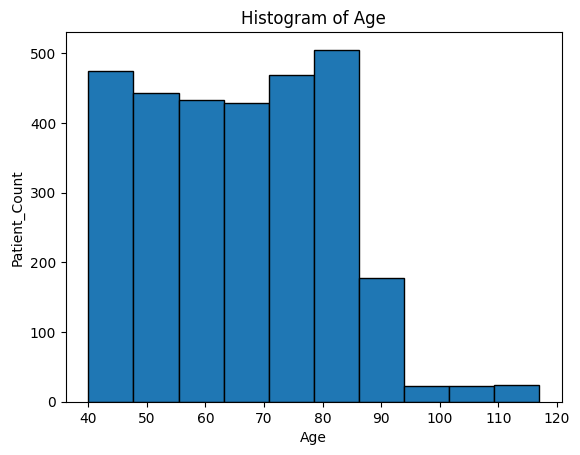

In [24]:
#To check normality of data

import matplotlib.pyplot as plt

plt.hist(data['Age'], bins=10, edgecolor='black')
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Patient_Count')
plt.show()

Since age is not normally distributed, using methods like the Z-score may not be appropriate. Instead, the Interquartile Range (IQR) method is a robust approach for detecting outliers, especially with skewed data.

In [25]:
#To calculate quartiles and IQR

Q1 = data['Age'].quantile(0.25)
Q3 = data['Age'].quantile(0.75)
IQR = Q3 - Q1

print(Q1,Q3,IQR)

52.0 79.0 27.0


In [26]:
# Step 2: Define outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(lower_bound, upper_bound)

11.5 119.5


In [27]:
#Identify outliers
outliers = data[(data['Age'] < lower_bound) | (data['Age'] > upper_bound)]

# Display outliers
if not outliers.empty:
    print("Outliers in Age:")
    print(outliers)
else:
    print("No outliers detected in Age.")

No outliers detected in Age.


Even though a box plot might not show obvious outliers based on statistical methods (like IQR), certain age values in the 117-year-old range may still be considered outliers from a clinical perspective because they fall outside of a typical age range for lung cancer patients.Capping the Age field to a maximum of 95 or 100 reflects a more realistic and medically appropriate range, based on what is commonly observed in this type of dataset.

In [28]:
# Cap the age to a maximum value of 95 or 100
data['Age'] = np.where(data['Age'] > 95, 95, data['Age'])

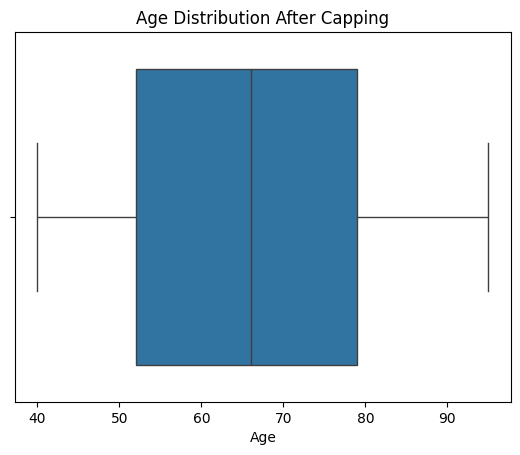

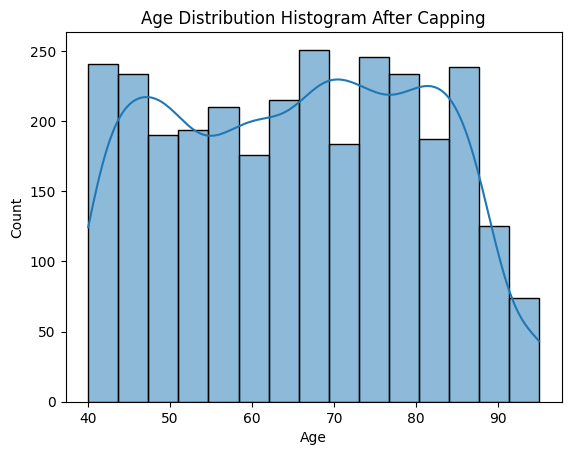

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot age distribution after capping
sns.boxplot(x=data['Age'])
plt.title('Age Distribution After Capping')
plt.show()

sns.histplot(data['Age'], kde=True)
plt.title('Age Distribution Histogram After Capping')
plt.show()

The age data was capped at 95 years, as values above this threshold were deemed unrealistic in the context of the dataset. 

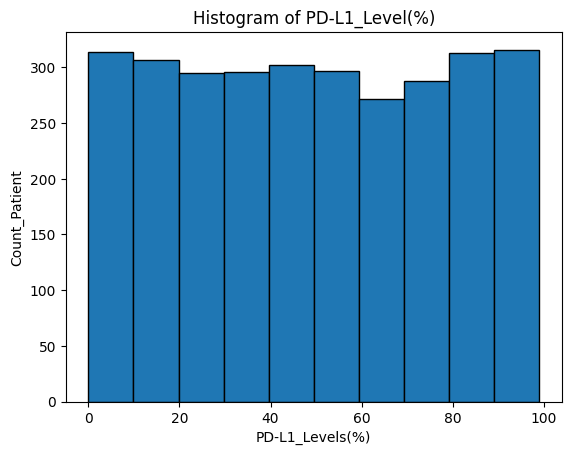

In [30]:
#To check normality of data, PD-L1_Level

import matplotlib.pyplot as plt

plt.hist(data['PD-L1_Level(%)'], bins=10, edgecolor='black')
plt.title('Histogram of PD-L1_Level(%)')
plt.xlabel('PD-L1_Levels(%)')
plt.ylabel('Count_Patient')
plt.show()

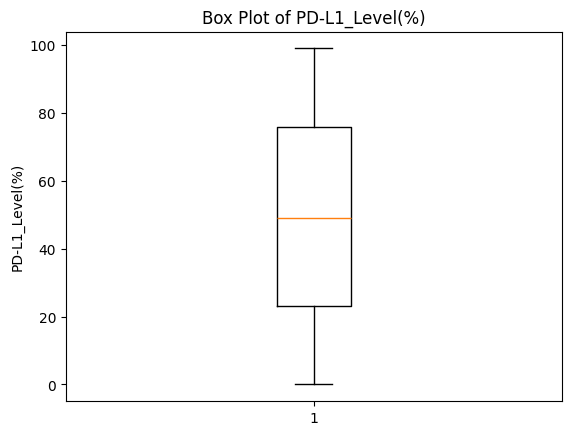

In [31]:
import matplotlib.pyplot as plt

plt.boxplot(data['PD-L1_Level(%)'])
plt.title('Box Plot of PD-L1_Level(%)')
plt.ylabel('PD-L1_Level(%)')
plt.show()


Here PD-L1_Level field has no any outliers.

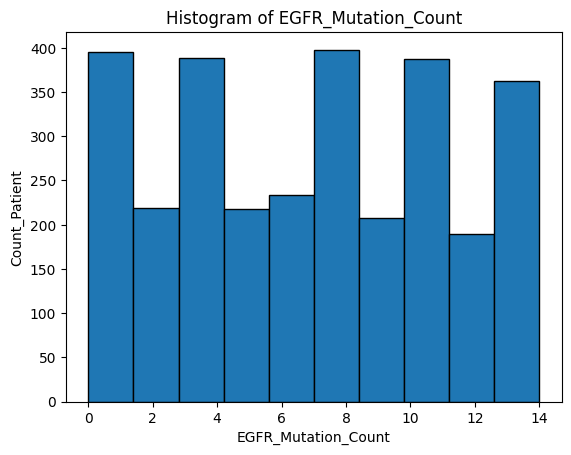

In [32]:
#To check normality of data EGFR_Mutation_Count

import matplotlib.pyplot as plt

plt.hist(data['EGFR_Mutation_Count'], bins=10, edgecolor='black')
plt.title('Histogram of EGFR_Mutation_Count')
plt.xlabel('EGFR_Mutation_Count')
plt.ylabel('Count_Patient')
plt.show()

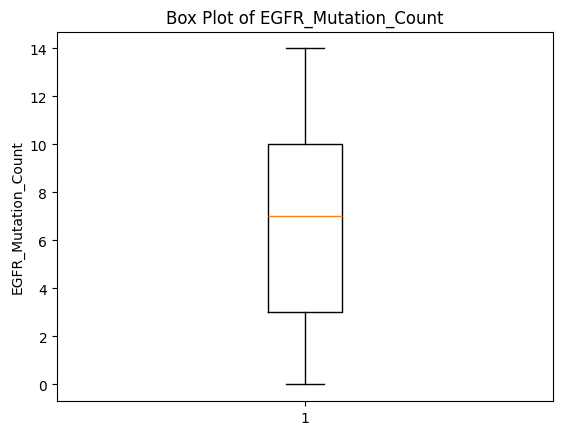

In [33]:
import matplotlib.pyplot as plt

plt.boxplot(data['EGFR_Mutation_Count'])
plt.title('Box Plot of EGFR_Mutation_Count')
plt.ylabel('EGFR_Mutation_Count')
plt.show()

No any outliers detected in EGFR_Mutation_Count.

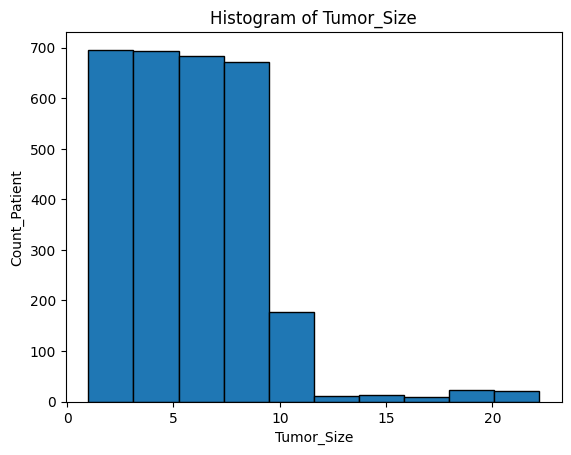

In [34]:
#To check normality of data Tumor_Size

import matplotlib.pyplot as plt

plt.hist(data['Tumor_Size'], bins=10, edgecolor='black')
plt.title('Histogram of Tumor_Size')
plt.xlabel('Tumor_Size')
plt.ylabel('Count_Patient')
plt.show()

It is observed that the values are positively skewed.

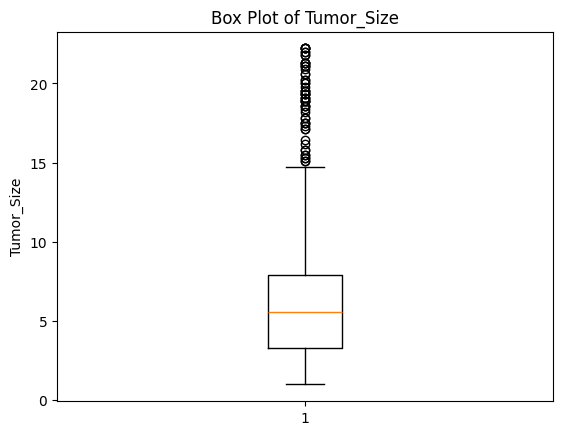

In [35]:

plt.boxplot(data['Tumor_Size'])
plt.title('Box Plot of Tumor_Size')
plt.ylabel('Tumor_Size')
plt.show()

Here their are outliers detected and as from the histogram it is positively skewed data.For reference, in NSCLC, tumors greater than 10 cm are usually considered large and might correspond to later stages (III or IV) of cancer, or could be a rare case.Stage IV cancers (advanced) may involve tumors that are larger than 5 cm, and in some rare cases, the tumor can grow larger than 10 cm.So we cap the values above 10cm.

In [36]:
#Capping the tumor size

data['Tumor_Size'] = np.where(data['Tumor_Size'] > 10, 10, data['Tumor_Size'])


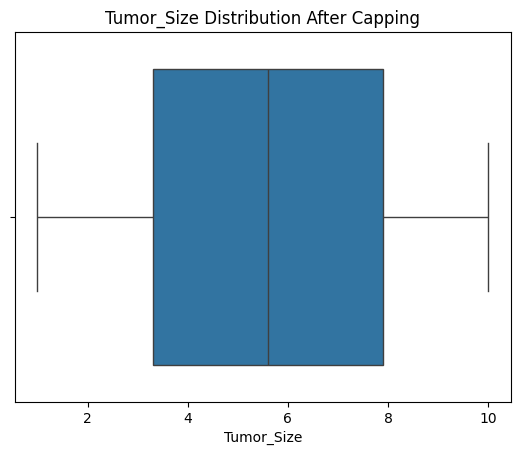

In [37]:

# Plot age distribution after capping
sns.boxplot(x=data['Tumor_Size'])
plt.title('Tumor_Size Distribution After Capping')
plt.show()


# Univariate Analysis

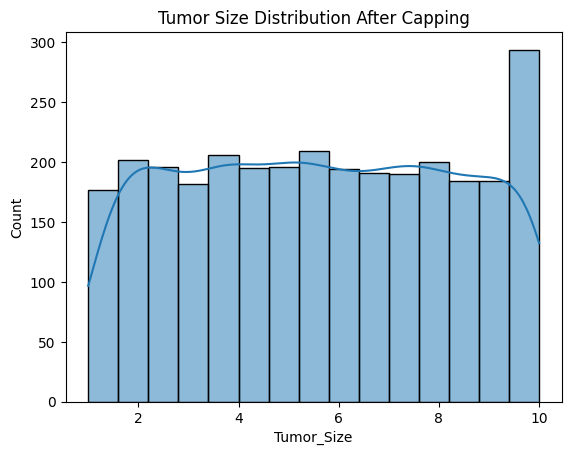

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histogram for Tumor Size after capping.
sns.histplot(data['Tumor_Size'], kde=True)
plt.title('Tumor Size Distribution After Capping')
plt.show()





After capping, the distribution of Tumor_Size remains right-skewed,  indicating that the majority of tumor sizes are smaller with a few extreme large tumor sizes. . This skewness can affect the logistic regression model, potentially leading to biased or less reliable predictions. Transforming Tumor_Size using a suitable transformation and standardizing it can make the data more symmetric and improve model performance.

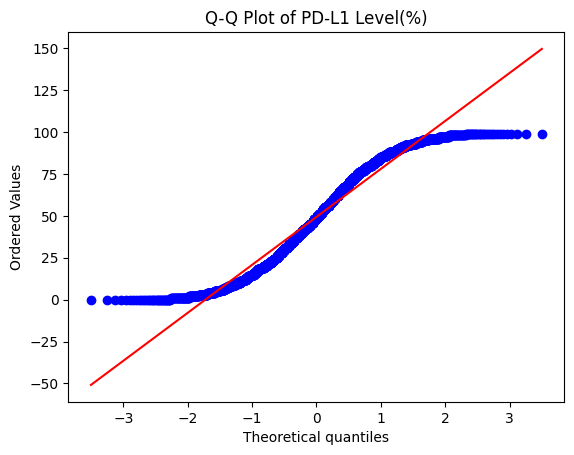

In [39]:
import scipy.stats as stats
import matplotlib.pyplot as plt

# Q-Q plot for PD-L1 Level
stats.probplot(data['PD-L1_Level(%)'], dist="norm", plot=plt)
plt.title("Q-Q Plot of PD-L1 Level(%)")
plt.show()


The Q-Q plot is indicating right skewness in the variable, which can impact logistic regression by introducing bias and reducing model interpretability. To address this,need to apply a log or power transformation to reduce skewness, followed by standardization to ensure consistent scaling. This will help meet logistic regression assumptions, improving the model's accuracy and interpretability.

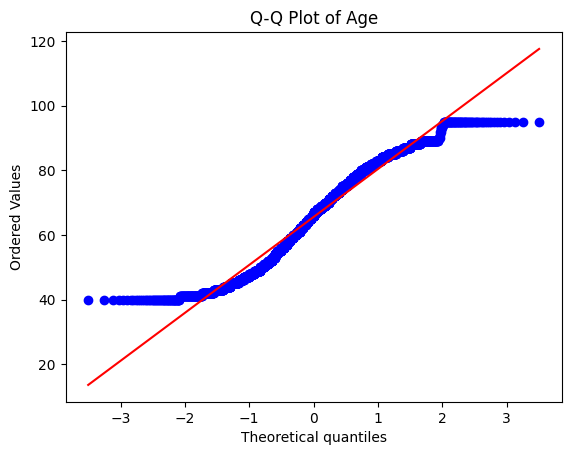

In [40]:
import scipy.stats as stats
import matplotlib.pyplot as plt

# Q-Q plot for PD-L1 Level
stats.probplot(data['Age'], dist="norm", plot=plt)
plt.title("Q-Q Plot of Age")
plt.show()


The distribution of Age remains right-skewed, with most individuals being younger and fewer individuals in the older age groups. This skewness can negatively impact the logistic regression model, potentially causing biased predictions or underrepresentation of older individuals. Applying a transformation (such as a logarithmic or square root transformation) and standardizing the data can help normalize the distribution and improve model performance.

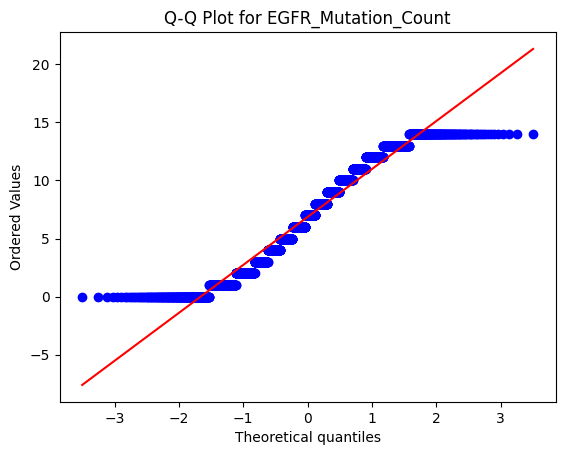

In [41]:
import scipy.stats as stats
import matplotlib.pyplot as plt

# Q-Q plot for EGFR_Mutation_Count
stats.probplot(data['EGFR_Mutation_Count'], dist="norm", plot=plt)
plt.title('Q-Q Plot for EGFR_Mutation_Count')
plt.show()


The distribution of EGFR Mutation Count is also right-skewed, with the majority of individuals having low mutation counts and a few having a higher mutation count. This skewness may lead to potential issues in the logistic regression model, as the data may not represent the full spectrum of mutation counts properly. A transformation such as a logarithmic transformation can make the data more symmetric, reducing the effect of outliers and enhancing model predictions.

In [42]:
from scipy.stats import shapiro

# Shapiro-Wilk Test for Normality on Age, PD_L1_Level, Tumor_Size, and EGFR_Mutation_Count
stat_age, p_value_age = shapiro(data['Age'])

stat_tumorsize, p_value_tumorsize = shapiro(data['Tumor_Size'])
stat_egfr, p_value_egfr = shapiro(data['EGFR_Mutation_Count'])

# Output the results
print(f"Shapiro-Wilk Test for Age: Statistic = {stat_age}, P-value = {p_value_age}")

print(f"Shapiro-Wilk Test for Tumor Size: Statistic = {stat_tumorsize}, P-value = {p_value_tumorsize}")
print(f"Shapiro-Wilk Test for EGFR Mutation Count: Statistic = {stat_egfr}, P-value = {p_value_egfr}")


Shapiro-Wilk Test for Age: Statistic = 0.9602790036090553, P-value = 6.41696781611323e-28
Shapiro-Wilk Test for Tumor Size: Statistic = 0.9535959828788101, P-value = 7.22737100722609e-30
Shapiro-Wilk Test for EGFR Mutation Count: Statistic = 0.9499583508800249, P-value = 7.733926146785012e-31


Gender
Female    1680
Male      1320
Name: count, dtype: Int64
Cancer_Stage
Stage III    1023
Stage II      996
Stage IV      981
Name: count, dtype: Int64


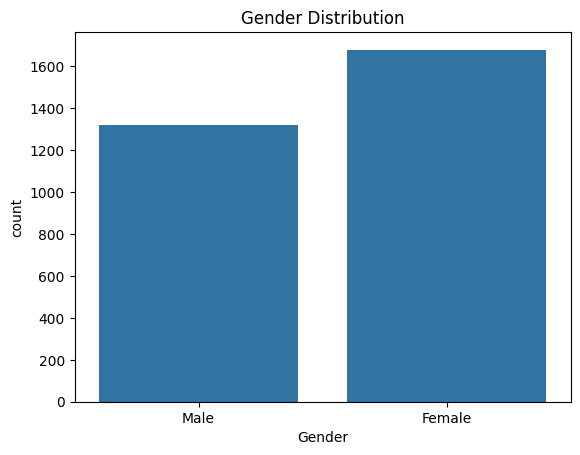

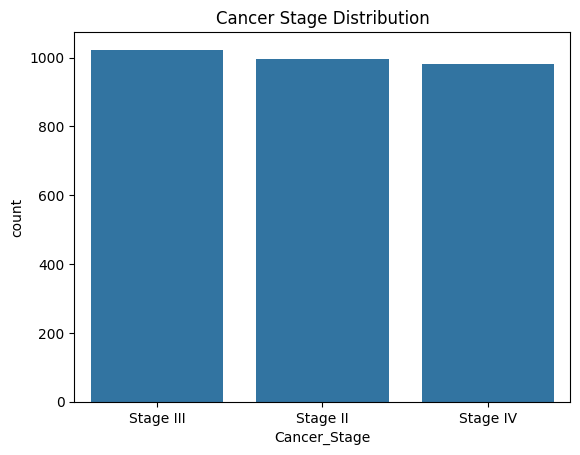

In [43]:
# Frequency count for categorical features
print(data['Gender'].value_counts())
print(data['Cancer_Stage'].value_counts())

# Bar Plot for Cancer Stage
sns.countplot(data=data, x='Gender')
plt.title("Gender Distribution")
plt.show()



# Bar Plot for Cancer Stage
sns.countplot(data=data, x='Cancer_Stage')
plt.title("Cancer Stage Distribution")
plt.show()


Gender: 
The Gender distribution shows a balanced dataset, with 1680 females and 1320 males. There is no significant imbalance between the categories, which is good for logistic regression, as it ensures that the model doesn't favor one category over the other. It can be be encoded into a binary form (e.g., Female = 0, Male = 1) for logistic regression, ensuring the model interprets it correctly.

Cancer Stage: 
    The Cancer Stage distribution shows relatively balanced categories across Stage II, III, and IV, with Stage III being slightly more frequent. This balance is generally positive for logistic regression as no category is overly dominant. Need to be properly encoded (e.g., one-hot encoding or ordinal encoding) to ensure the logistic regression model correctly interprets the categories.


Smoking_Status
Current          919
Former           901
Never            880
Not Specified    300
Name: count, dtype: Int64
Treatment_Type
Chemotherapy     1517
Immunotherapy    1483
Name: count, dtype: Int64


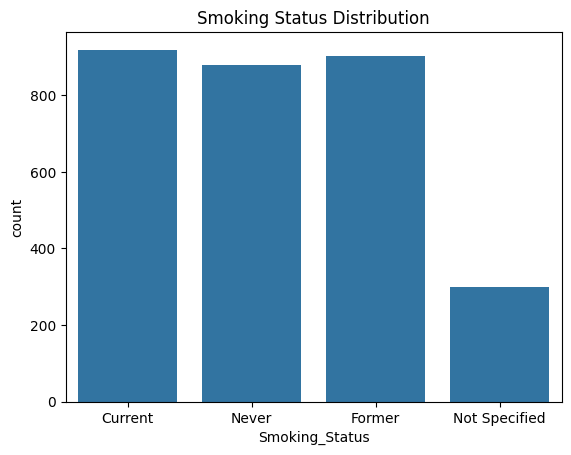

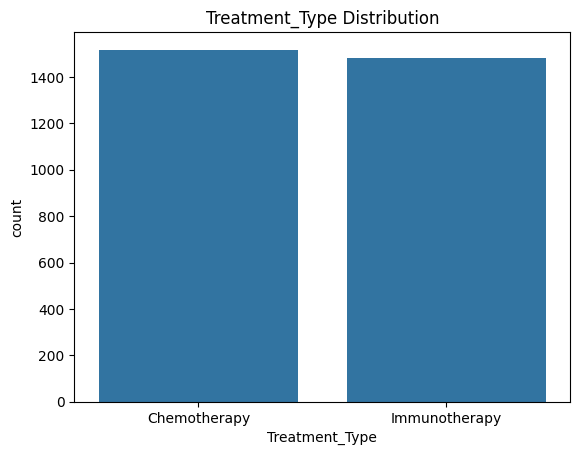

In [44]:
# Frequency count for categorical features
print(data['Smoking_Status'].value_counts())

print(data['Treatment_Type'].value_counts())

# Bar Plot for Smoking Status
sns.countplot(data=data, x='Smoking_Status')
plt.title("Smoking Status Distribution")
plt.show()

sns.countplot(data=data, x='Treatment_Type')
plt.title("Treatment_Type Distribution")
plt.show()

Smoking Status:
    The Smoking Status distribution is slightly imbalanced, with Not Specified being less frequent, but overall, the categories (Current, Former, Never) are relatively balanced. This distribution may require attention to avoid the "Not Specified" category from becoming an issue during modeling.

Treatment Type: The Treatment_Type distribution is balanced with almost equal counts of Chemotherapy (1517) and Immunotherapy (1483). This is positive for logistic regression as no treatment type will dominate the model’s learning process, helping to avoid biased predictions.

# Bivariate Analysis

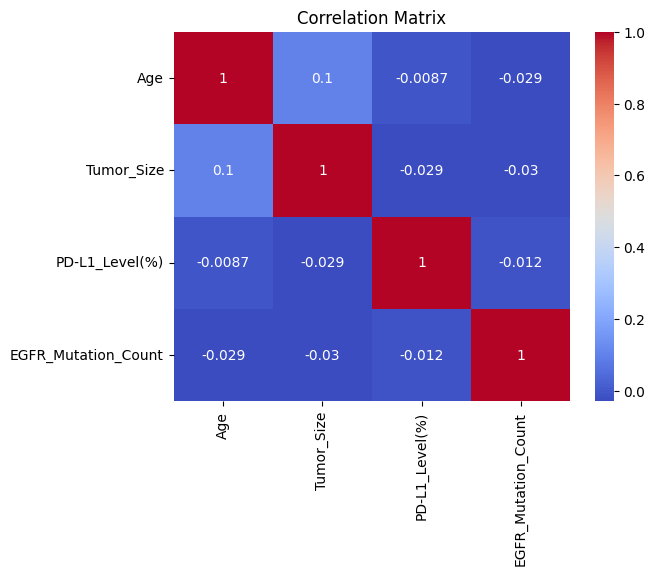

In [45]:

# Correlation matrix for numerical features
corr_matrix = data[['Age', 'Tumor_Size', 'PD-L1_Level(%)', 'EGFR_Mutation_Count']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


The correlation between Age, Tumor Size, PD-L1 Level(%), and EGFR Mutation Count is very weak, meaning these variables don't strongly influence each other. This is good for logistic regression as it reduces the risk of multicollinearity, allowing each feature to contribute independently to the model.

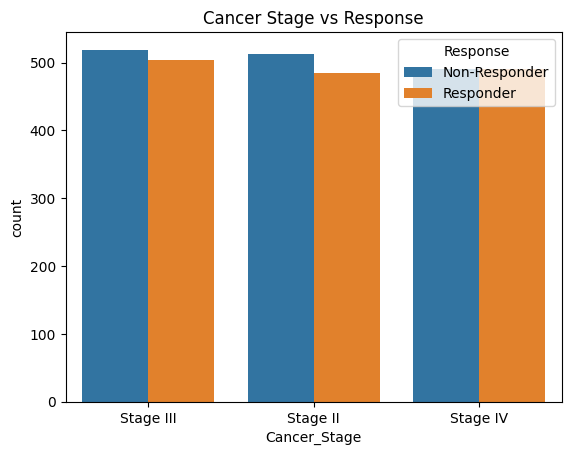

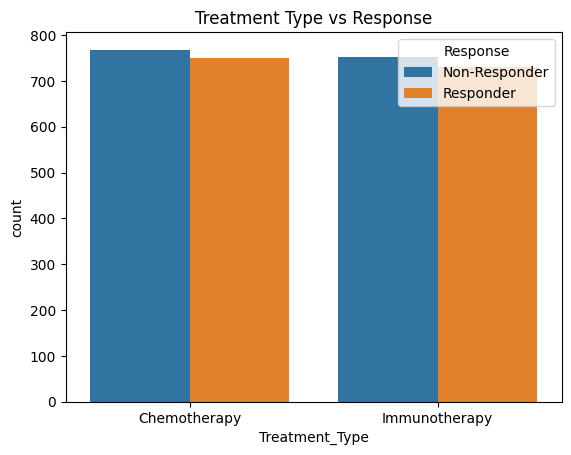

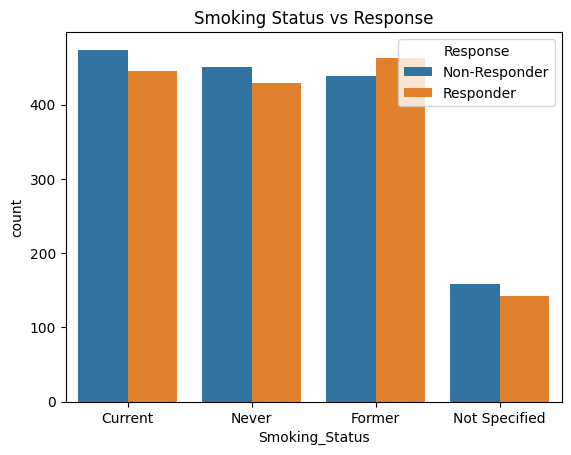

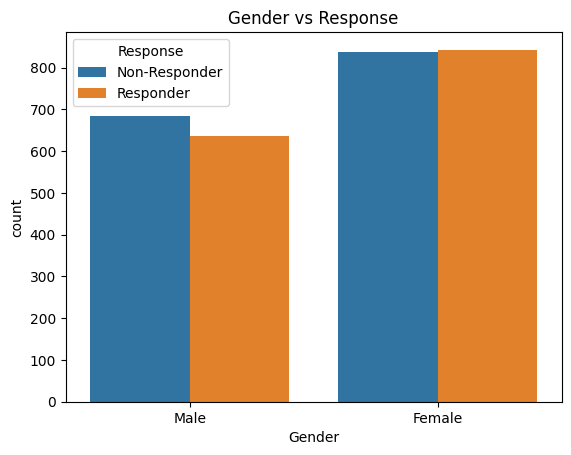

In [46]:
# For Treatment_Type vs Response
sns.countplot(data=data, x='Cancer_Stage', hue='Response')
plt.title("Cancer Stage vs Response")
plt.show()

# For Treatment_Type vs Response
sns.countplot(data=data, x='Treatment_Type', hue='Response')
plt.title("Treatment Type vs Response")
plt.show()

# For Smoking_Status vs Response
sns.countplot(data=data, x='Smoking_Status', hue='Response')
plt.title("Smoking Status vs Response")
plt.show()

# For Gender vs Response
sns.countplot(data=data, x='Gender', hue='Response')
plt.title("Gender vs Response")
plt.show()


Smoking Status vs Response:
    Smoking Status may not be a strong standalone predictor of response, as the distribution of responses is fairly even across the different smoking categories. However, it could still provide some predictive value when combined with other factors such as Cancer Stage or Tumor Size in the logistic regression model.

Gender vs Resoponse:
slightly better response rate in females compared to males, although the overall difference in response rates is not drastic. While Gender appears to have some potential impact on the response, it may not be the most powerful standalone predictor in a logistic regression model. It could be more informative when combined with other variables like Cancer Stage, Tumor Size, or Treatment Type for more accurate predictions.

### Feature Engineering

In [47]:
#import MinMaxScalar
from sklearn.preprocessing import MinMaxScaler

# seprate numerical columns
numerical_columns = ["Age", "PD-L1_Level(%)", "EGFR_Mutation_Count", "Tumor_Size"]

scaler = MinMaxScaler()

# Apply MinMaxScaler
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

data.head()



,Patient_ID,Age,Gender,Cancer_Stage,PD-L1_Level(%),EGFR_Mutation_Count,Tumor_Size,Treatment_Type,Smoking_Status,Response
0,1,0.400000,Male,Stage III,1.000000,0.571429,0.900000,Chemotherapy,Current,Non-Responder
1,2,0.563636,Female,Stage II,0.929293,0.785714,0.755556,Chemotherapy,Never,Responder
2,3,0.290909,Female,Stage IV,0.222222,0.571429,0.833333,Immunotherapy,Former,Responder
3,4,0.709091,Female,Stage IV,0.313131,0.214286,0.777778,Chemotherapy,Former,Non-Responder
4,5,0.345455,Male,Stage II,0.101010,1.000000,0.977778,Chemotherapy,Not Specified,Non-Responder


Min-Max scaling was applied to normalize the values of numerical features, bringing them into a range of 0 to 1. This transformation helps ensure that each feature contributes equally to the model
Min-Max scaling preserves the relative distribution of values within a feature, making it ideal for cases where you want to retain the relationships between values without introducing negative numbers or changing the data distribution's shape.

### One Hot Encoding 

In [48]:
# one-hot encoding to nominal columns
data1 = pd.get_dummies(data, columns=['Gender', 'Treatment_Type', 'Smoking_Status'], drop_first=True)

for col in data1.columns:
    if col not in ['Patient_ID', 'Age', 'Cancer_Stage', 'PD-L1_Level(%)', 'EGFR_Mutation_Count', 'Tumor_Size', 'Response']:
        data1[col] = data1[col].astype(int)

data1.head()


,Patient_ID,Age,Cancer_Stage,PD-L1_Level(%),EGFR_Mutation_Count,Tumor_Size,Response,Gender_Male,Treatment_Type_Immunotherapy,Smoking_Status_Former,Smoking_Status_Never,Smoking_Status_Not Specified
0,1,0.400000,Stage III,1.000000,0.571429,0.900000,Non-Responder,1,0,0,0,0
1,2,0.563636,Stage II,0.929293,0.785714,0.755556,Responder,0,0,0,1,0
2,3,0.290909,Stage IV,0.222222,0.571429,0.833333,Responder,0,1,1,0,0
3,4,0.709091,Stage IV,0.313131,0.214286,0.777778,Non-Responder,0,0,1,0,0
4,5,0.345455,Stage II,0.101010,1.000000,0.977778,Non-Responder,1,0,0,0,1


In the code above, one-hot encoding is applied to columns like Gender, Treatment_Type, and Smoking_Status because these columns are nominal, meaning their categories represent distinct groups without any meaningful order.

### Label Encoding - Using Maping

In [49]:
data1['Cancer_Stage'].unique()

<StringArray>
['Stage III', 'Stage II', 'Stage IV']
Length: 3, dtype: string

In [50]:
# By using maping function

data1['Cancer_Stage'] = data1["Cancer_Stage"].map({'Stage II':0,'Stage III':1, 'Stage IV':2})
data1.head()

,Patient_ID,Age,Cancer_Stage,PD-L1_Level(%),EGFR_Mutation_Count,Tumor_Size,Response,Gender_Male,Treatment_Type_Immunotherapy,Smoking_Status_Former,Smoking_Status_Never,Smoking_Status_Not Specified
0,1,0.400000,1,1.000000,0.571429,0.900000,Non-Responder,1,0,0,0,0
1,2,0.563636,0,0.929293,0.785714,0.755556,Responder,0,0,0,1,0
2,3,0.290909,2,0.222222,0.571429,0.833333,Responder,0,1,1,0,0
3,4,0.709091,2,0.313131,0.214286,0.777778,Non-Responder,0,0,1,0,0
4,5,0.345455,0,0.101010,1.000000,0.977778,Non-Responder,1,0,0,0,1


To perform label encoding on the Cancer_Stage column using the map function, we can map each stage to a meaningful ordinal value. Since Cancer_Stage is ordinal, encoding it in sequence (e.g., Stage I = 0, Stage II = 1, Stage III = 2) will maintain the meaningful order.

In [51]:
# Import LabelEncoder

from sklearn.preprocessing import LabelEncoder

Encoder = LabelEncoder()

In [52]:
# Convert the target column into numerical

data1['Response'] = Encoder.fit_transform(data1['Response'])
data1.head()

,Patient_ID,Age,Cancer_Stage,PD-L1_Level(%),EGFR_Mutation_Count,Tumor_Size,Response,Gender_Male,Treatment_Type_Immunotherapy,Smoking_Status_Former,Smoking_Status_Never,Smoking_Status_Not Specified
0,1,0.400000,1,1.000000,0.571429,0.900000,0,1,0,0,0,0
1,2,0.563636,0,0.929293,0.785714,0.755556,1,0,0,0,1,0
2,3,0.290909,2,0.222222,0.571429,0.833333,1,0,1,1,0,0
3,4,0.709091,2,0.313131,0.214286,0.777778,0,0,0,1,0,0
4,5,0.345455,0,0.101010,1.000000,0.977778,0,1,0,0,0,1


In [53]:
# Rearrange the target column

# Empty list for columns
columns = []

# adding all columns except "Response" col
for i in data1.columns:
    if i != "Response":
        columns.append(i)

# append response column at the end         
columns.append('Response')

new_df = data1[columns]

new_df.head()

,Patient_ID,Age,Cancer_Stage,PD-L1_Level(%),EGFR_Mutation_Count,Tumor_Size,Gender_Male,Treatment_Type_Immunotherapy,Smoking_Status_Former,Smoking_Status_Never,Smoking_Status_Not Specified,Response
0,1,0.400000,1,1.000000,0.571429,0.900000,1,0,0,0,0,0
1,2,0.563636,0,0.929293,0.785714,0.755556,0,0,0,1,0,1
2,3,0.290909,2,0.222222,0.571429,0.833333,0,1,1,0,0,1
3,4,0.709091,2,0.313131,0.214286,0.777778,0,0,1,0,0,0
4,5,0.345455,0,0.101010,1.000000,0.977778,1,0,0,0,1,0


### Model Building

In [54]:
# Inmport required models

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score, accuracy_score, precision_score, f1_score, classification_report


In [55]:
# Splitting data

X = new_df.drop(columns=['Patient_ID', 'Response'])
y = new_df['Response']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Logistic Regression

In [56]:
# Logistic Regression

param_grid_lr = {'C': [0.01, 0.1, 1, 10],
                 'penalty': ['l1', 'l2']}


# Grid search for Logistic Regression
lr = LogisticRegression(solver='liblinear')
grid_search_lr = GridSearchCV(lr, param_grid_lr, cv=5, scoring='recall', n_jobs=-1)
grid_search_lr.fit(X_train, y_train)

# Evaluate Logistic Regression model
best_model_lr = grid_search_lr.best_estimator_
y_pred_lr = best_model_lr.predict(X_test)
recall_lr = recall_score(y_test, y_pred_lr)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr)
f1_score_lr = f1_score(y_test, y_pred_lr)

print("Best Logistic Regression Model:", best_model_lr)
print("Recall for Logistic Regression:", recall_lr)
print("Accuracy for Logistic Regression:", accuracy_lr)
print("Precision for Logistic Regression", precision_lr)
print("F1 Score for Logistic Regression:", f1_score_lr )
print("Classification Report:\n", classification_report(y_test, y_pred_lr))


Best Logistic Regression Model: LogisticRegression(C=10, solver='liblinear')
Recall for Logistic Regression: 0.2891156462585034
Accuracy for Logistic Regression: 0.505
Precision for Logistic Regression 0.4913294797687861
F1 Score for Logistic Regression: 0.3640256959314775
Classification Report:
               precision    recall  f1-score   support

           0       0.51      0.71      0.59       306
           1       0.49      0.29      0.36       294

    accuracy                           0.51       600
   macro avg       0.50      0.50      0.48       600
weighted avg       0.50      0.51      0.48       600



# XGBoost

In [57]:
# Import the module xgboost

! pip install xgboost


[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/fe/df/e3a1f3f008db8d2b199ded2168014c7784b8027714b74d802c892815fd72/xgboost-2.1.2-py3-none-win_amd64.whl.metadata
Using cached xgboost-2.1.2-py3-none-win_amd64.whl (124.9 MB)


In [59]:
import xgboost
from xgboost import XGBClassifier

# Define parameter grid for XGBoost
param_grid_xgb = {'n_estimators': [100, 200, 300],
                  'max_depth': [3, 5, 7],
                  'learning_rate': [0.01, 0.1, 0.3]}

# Grid search for XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
grid_search_xgb = GridSearchCV(xgb, param_grid_xgb, cv=5, scoring='recall', n_jobs=-1)
grid_search_xgb.fit(X_train, y_train)

# Evaluate XGBoost model
best_model_xgb = grid_search_xgb.best_estimator_
y_pred_xgb = best_model_xgb.predict(X_test)
recall_xgb = recall_score(y_test, y_pred_xgb)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb)
f1_score_xgb = f1_score(y_test, y_pred_xgb)

print("Best XGBoost Model:", best_model_xgb)
print("Recall for XGBoost:", recall_xgb)
print("Accuracy for XGBoost:", accuracy_xgb)
print("Precision for XGBoost:", precision_xgb)
print("F1 Score for XGB:", f1_score_xgb)
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))

Best XGBoost Model: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.01, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)
Recall for XGBoost: 0.47959183673469385
Accuracy for XGBoost: 0.49
Precision for XGBoost: 0.47959183673469385
F1 Score for XGB: 0.47959183673469385
Classification Report:
               precision    recall  f1-score   suppo

c:\Users\ravik\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:23:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


# Support Vector Classifier

In [ ]:

from sklearn.svm import SVC

# Define parameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [0.01, 0.1, 1],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid']  # Corrected typo in 'poly'
}

# Initialize the SVC model
svm_model = SVC()

# Set up GridSearchCV
grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Output the best parameters and score from grid search
print('Best Parameters:', grid_search.best_params_)
print('Best Cross-Validation Score:', grid_search.best_score_)

# Use the best model to make predictions on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Calculate and print accuracy on test data
test_data_score = accuracy_score(y_test, y_pred)
print('Test Data Accuracy:', test_data_score)

precision_svc = precision_score(y_test, y_pred)
recall_svc = recall_score(y_test, y_pred)
f1_score_svc = f1_score(y_test, y_pred)

print("Precision for SVC:", precision_svc)
print("recall for SVC:", recall_svc)
print("F1 score for SVC:", f1_score_svc)
print("Classification Report:\n", classification_report(y_test, y_pred))

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest Model
random_forest = RandomForestClassifier(random_state=42)

# Define hyperparameters for random forest
param_grid_random_forest = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Train with GridSearchCV
grid_search_random_forest = GridSearchCV(estimator=random_forest, param_grid=param_grid_random_forest, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_random_forest.fit(X_train, y_train)

# Best model and evaluation
best_random_forest = grid_search_random_forest.best_estimator_
y_pred_random_forest = best_random_forest.predict(X_test)
accuracy_random_forest = accuracy_score(y_test, y_pred_random_forest)
precision_rf = precision_score(y_test, y_pred_random_forest)
recall_rf = recall_score(y_test, y_pred_random_forest)
f1_score_rf = f1_score(y_test, y_pred_random_forest)

print("Random Forest Best Parameters:", grid_search_random_forest.best_params_)
print("Random Forest Accuracy:", accuracy_random_forest)
print("Random Forest Precision:", precision_rf)
print("Random Forest recall:", recall_rf)
print("Random Forest f1_score:", f1_score_rf)
print("Classification Report:\n", classification_report(y_test, y_pred_random_forest))

Random Forest Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Random Forest Accuracy: 0.4583333333333333
Random Forest Precision: 0.44106463878326996
Random Forest recall: 0.3945578231292517
Random Forest f1_score: 0.41651705565529623
Classification Report:
               precision    recall  f1-score   support

           0       0.47      0.52      0.49       306
           1       0.44      0.39      0.42       294

    accuracy                           0.46       600
   macro avg       0.46      0.46      0.46       600
weighted avg       0.46      0.46      0.46       600



# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
 
# Assuming you have the features and target variables as X and y
# Assuming 'new_df' is your DataFrame
X = new_df.drop('Response', axis=1)  # Features (all columns except Response)
y = new_df['Response']  # Target variable (Response)
# Splitting the data (80% for training, 20% for testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
 
# Define the model
dt_model = DecisionTreeClassifier(random_state=42)
 
# Define hyperparameter grid for tuning
param_grid = {
    'criterion': ['gini', 'entropy'],           # Measure of split quality
    'max_depth': [None, 5, 10, 20],    # Depth of the tree
    'min_samples_split': [2, 5, 10],        # Min samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]           # Min samples required to be a leaf node
}
 
# Set up GridSearchCV with cross-validation
grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
 
# Fit the model to the training data
grid_search.fit(X_train, y_train)
 
# Get the best model from grid search
best_dt_model = grid_search.best_estimator_
 
# Evaluate the model on the test data
y_pred = best_dt_model.predict(X_test)
 
# Print out the results of the evaluation
print("Best Hyperparameters:", grid_search.best_params_)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Best Hyperparameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10}
Test Accuracy: 0.49333333333333335
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.55      0.53       306
           1       0.48      0.43      0.46       294

    accuracy                           0.49       600
   macro avg       0.49      0.49      0.49       600
weighted avg       0.49      0.49      0.49       600

